## TensorFlowでIris問題を解く

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from IPython.display import display
import seaborn as sns
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report
from sklearn.metrics import confusion_matrix
from tensorflow import keras  
import tensorflow as tf

### Iris問題を解いてみる
petal : 花弁  
sepal : がく片

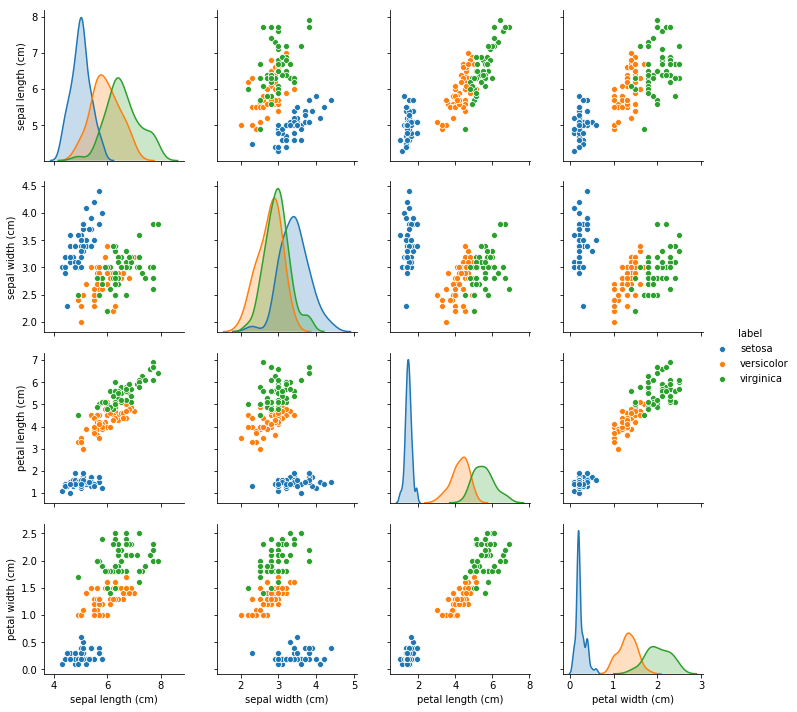

In [10]:
# データの読み込み
from sklearn.datasets import load_iris
iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris["label"] = iris.target
df_iris["label"] = df_iris["label"].map({0:iris.target_names[0], 1:iris.target_names[1], 2:iris.target_names[2]})
sns.pairplot(df_iris, hue="label")

In [11]:
# データの準備
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

# one-hotベクトルに変換
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("X_train=",X_train)
print()
print("X_test=",X_test)
print()
print("y_train=",y_train)
print()
print("y_test=",y_test)

X_train= [[4.9 3.1 1.5 0.1]
 [5.8 2.8 5.1 2.4]
 [6.7 3.  5.2 2.3]
 [7.7 3.  6.1 2.3]
 [6.7 3.1 5.6 2.4]
 [4.9 3.  1.4 0.2]
 [6.5 3.  5.2 2. ]
 [7.6 3.  6.6 2.1]
 [6.2 2.9 4.3 1.3]
 [4.9 2.4 3.3 1. ]
 [5.6 2.9 3.6 1.3]
 [5.6 3.  4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [6.6 2.9 4.6 1.3]
 [5.1 3.5 1.4 0.3]
 [5.1 3.4 1.5 0.2]
 [7.4 2.8 6.1 1.9]
 [5.7 2.5 5.  2. ]
 [6.5 3.2 5.1 2. ]
 [5.1 3.7 1.5 0.4]
 [5.5 4.2 1.4 0.2]
 [5.1 3.5 1.4 0.2]
 [6.3 2.5 5.  1.9]
 [6.  2.2 4.  1. ]
 [6.1 2.6 5.6 1.4]
 [6.7 3.3 5.7 2.5]
 [5.7 2.8 4.5 1.3]
 [5.  3.6 1.4 0.2]
 [6.4 2.7 5.3 1.9]
 [5.4 3.7 1.5 0.2]
 [7.9 3.8 6.4 2. ]
 [5.7 4.4 1.5 0.4]
 [6.  2.9 4.5 1.5]
 [5.6 3.  4.1 1.3]
 [5.4 3.9 1.7 0.4]
 [5.8 2.7 4.1 1. ]
 [5.  3.4 1.5 0.2]
 [6.2 3.4 5.4 2.3]
 [6.4 2.8 5.6 2.2]
 [6.  3.  4.8 1.8]
 [6.  3.4 4.5 1.6]
 [5.7 3.8 1.7 0.3]
 [5.  3.3 1.4 0.2]
 [5.9 3.  5.1 1.8]
 [6.  2.7 5.1 1.6]
 [5.5 2.6 4.4 1.2]
 [5.1 3.8 1.9 0.4]
 [6.7 3.1 4.7 1.5]
 [6.5 3.  5.8 2.2]
 [5.9 3.2 4.8 1.8]
 [6.3 3.3 4.7 1.6]
 [6.3 2.5 4.9 1.5]
 [4

### TensorFlowで解く

In [12]:
from tensorflow.compat.v1.keras import Sequential
from tensorflow.compat.v1.keras.layers import Dense, Dropout, Activation
from tensorflow.compat.v1.keras.optimizers import SGD,RMSprop, Adagrad, Adadelta, Adam

model = Sequential()
model.add(Dense(6, activation='relu', input_dim=4))
model.add(Dense(5, activation='relu', input_dim=6))
model.add(Dense(3, activation='softmax'))#最終層のactivationは変更しないこと

# ------ 最適化手法 ------
sgd = SGD(lr=0.01, momentum=0.9, nesterov=False)
# rms = RMSprop(lr=0.01)
# adag = Adagrad(lr=0.01)
# adad = Adadelta(lr=0.01)
# adam = Adam(lr=0.01)
# -----------------------------

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

# WARNINGが出るが気にしなくて良い

Train on 105 samples, validate on 45 samples
Epoch 1/50
105/105 [==============================] - 0s 1ms/sample - loss: 1.1720 - acc: 0.4095 - val_loss: 1.0033 - val_acc: 0.6222
Epoch 2/50
105/105 [==============================] - 0s 105us/sample - loss: 0.9393 - acc: 0.6476 - val_loss: 0.8396 - val_acc: 0.7333
Epoch 3/50
105/105 [==============================] - 0s 148us/sample - loss: 0.7843 - acc: 0.7143 - val_loss: 0.7116 - val_acc: 0.6222
Epoch 4/50
105/105 [==============================] - 0s 165us/sample - loss: 0.6099 - acc: 0.6952 - val_loss: 0.4967 - val_acc: 0.9556
Epoch 5/50
105/105 [==============================] - 0s 179us/sample - loss: 0.4816 - acc: 0.9429 - val_loss: 0.4368 - val_acc: 0.7333
Epoch 6/50
105/105 [==============================] - 0s 164us/sample - loss: 0.3952 - acc: 0.8000 - val_loss: 0.3556 - val_acc: 0.9111
Epoch 7/50
105/105 [==============================] - 0s 174us/sample - loss: 0.3441 - acc: 0.9143 - val_loss: 0.3050 - val_acc: 1.0000
Epoch

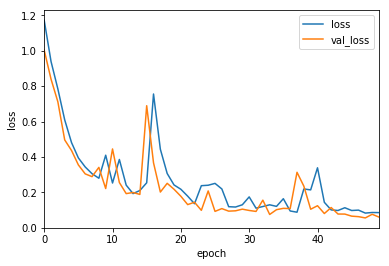

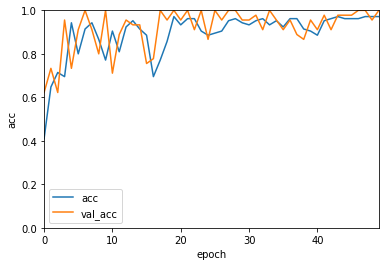

In [13]:
# 計算の実行
fit = model.fit(X_train, y_train,
          epochs=50,
          batch_size=20,validation_data=(X_test, y_test))

# 各epochにおける損失と精度をdfに入れる
df = pd.DataFrame(fit.history)

# グラフ化
df[["loss", "val_loss"]].plot()
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

df[["acc", "val_acc"]].plot()
plt.ylabel("acc")
plt.xlabel("epoch")
plt.ylim([0,1.0])
plt.show()

### [演習]
* epochを変更してみましょう
* batchサイズを変更してみましょう
* activationを変更してみましょう
* 層数を変更してみましょう
* 各層のノード数を変更してみましょう
* 学習率を変更してみましょう
* 学習率の最適化手法を変更してみましょう

### 計算結果の重みを表示する

In [14]:
weights = model.get_weights()
for i in range(len(weights)):
    print("weights[%s]="%i)
    print(weights[i])
    print("num:",weights[i].flatten().shape[0])
    print()

weights[0]=
[[-0.7640309  -0.15618646  1.1907209  -0.3979441   0.15126017 -0.44107407]
 [-0.00227171 -0.48244366  1.1947913  -0.05481476  0.8970933  -0.49125704]
 [-0.18307155 -0.11549687 -1.4980376   1.0894591  -0.9240792   0.44593716]
 [ 0.67314374 -0.57345384 -1.2395042   1.2318366  -0.10070802 -0.3367325 ]]
num: 24

weights[1]=
[ 0.          0.          0.5451549  -0.25980967  0.03349233  0.        ]
num: 6

weights[2]=
[[-0.48765472  0.6073683  -0.4929552  -0.30770606 -0.1381194 ]
 [-0.41911358  0.71486706  0.6770652   0.10331982  0.5784913 ]
 [ 1.3271774  -0.9020603  -0.14276572  0.18081583 -0.01321542]
 [-0.37340868  0.846608   -0.09628361  1.065329   -0.46308786]
 [ 0.50457525  0.83834094 -0.04399937 -0.68362397 -0.3753974 ]
 [-0.38428208  0.11312646 -0.30525956 -0.1834749   0.54628724]]
num: 30

weights[3]=
[ 0.37304568 -0.31424132 -0.00188623  0.1378332   0.        ]
num: 5

weights[4]=
[[ 0.36085248 -0.2216071  -1.5095907 ]
 [ 0.2978893  -0.55309594  0.9795989 ]
 [ 0.1264644

### [問]
* 重みは全部でいくつありますか？

### モデルの保存方法

In [15]:
from tensorflow.compat.v1.keras.models import load_model

# 保存
model.save('my_model.h5')
del model

# 読み込み
model = load_model('my_model.h5')

# WARNINGが出るが気にしなくて良い

W1115 21:08:52.212667 4614038976 hdf5_format.py:258] Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.


### 予測

In [16]:
y_pred = np.argmax(model.predict(X_test),axis=1)
y_pred

array([1, 1, 2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1,
       1, 1, 2, 0, 2, 1, 2, 0, 1, 2, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1, 0, 2,
       2])